In [14]:
import pandas as pd
import seaborn as sns
import matplotlib

sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv('datasets/clean/interim_clean_dataset_2021-06-05.csv')
df

,fips,county_name,state,vaccine_hesitant,vaccine_hesitant_strong,social_vulnerability_index,ethnicity_hispanic,ethnicity_native,ethnicity_asian,ethnicity_black,...,education_bachelors_degree,religion_total,religion_evangelical,religion_black_protestant,religion_mainline_protestant,religion_catholic,religion_orthodox,religion_other,election_democrat_wins,election_republican_wins
0,1131,"Wilcox County, Alabama",Alabama,0.23,0.11,0.93,0.0053,0.0009,0.0003,0.6938,...,0.125,610.450000,294.938889,257.670000,48.670000,1.030000,NaN,8.140000,4,0
1,1129,"Washington County, Alabama",Alabama,0.23,0.11,0.73,0.0146,0.0731,0.0025,0.2354,...,0.127,584.950000,420.398889,92.200000,70.640000,1.710000,NaN,NaN,0,4
2,1133,"Winston County, Alabama",Alabama,0.22,0.11,0.70,0.0315,0.0034,0.0016,0.0073,...,0.128,611.580000,551.340000,NaN,45.618889,9.108889,NaN,5.508889,0,4
3,1127,"Walker County, Alabama",Alabama,0.23,0.11,0.75,0.0249,0.0015,0.0049,0.0617,...,0.113,653.508889,583.648889,16.218889,38.078889,7.798889,NaN,7.758889,0,4
4,1125,"Tuscaloosa County, Alabama",Alabama,0.22,0.10,0.63,0.0372,0.0016,0.0161,0.3189,...,0.307,535.888889,368.870000,74.120000,63.780000,19.160000,NaN,9.970000,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,55079,"Milwaukee County, Wisconsin",Wisconsin,0.18,0.11,0.81,0.1500,0.0047,0.0428,0.2606,...,0.310,463.758889,122.708889,40.710000,54.500000,210.138889,9.58,26.128889,4,0
3107,55121,"Trempealeau County, Wisconsin",Wisconsin,0.18,0.10,0.28,0.0840,0.0034,0.0043,0.0051,...,0.193,736.360000,58.578889,NaN,410.220000,267.208889,NaN,0.350000,2,2
3108,56001,"Albany County, Wyoming",Wyoming,0.30,0.16,0.25,0.0953,0.0091,0.0327,0.0150,...,0.518,360.120000,67.250000,NaN,67.048889,127.468889,NaN,98.348889,2,2
3109,55067,"Langlade County, Wisconsin",Wisconsin,0.17,0.10,0.35,0.0197,0.0069,0.0022,0.0125,...,0.167,654.350000,199.030000,2.950000,85.048889,358.610000,NaN,8.710000,1,3


In [4]:
# TODO: Bar charts (univariate) to explore vaccine hesitancy cluster groups along demographic data
# TODO: Scatterplots and heatmaps to visualize correlations between vaccine hesitancy and demographic variables
# TODO: Choropleth maps to visualize geographical county level data of vaccine hesitancy and demographic variables.
# TODO: Box plot graphs on vaccine hesitancy rates to look at distribution and find out cut off values for groupings

Our vaccine hesitant mean, median and standard deviation are:  0.19474445515911284 ,  0.19  and  0.046197436775025455


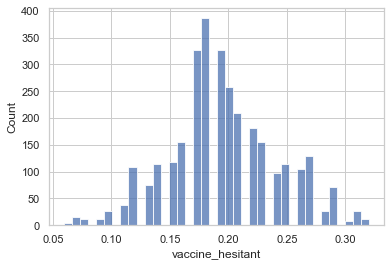

In [19]:
print('Our vaccine hesitant mean, median and standard deviation are: ', df['vaccine_hesitant'].mean(), ', ', df['vaccine_hesitant'].median(), ' and ', df['vaccine_hesitant'].std())
vaccine_hesitant_histogram = sns.histplot(data=df, x='vaccine_hesitant')
# TODO: Find out reason for missing columns, discuss slight right skew (median < mean)

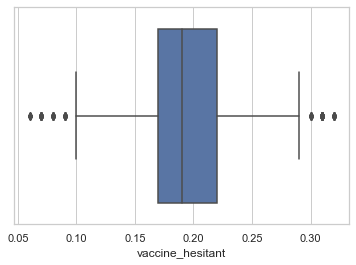

In [15]:
vaccine_hesitant_boxplot = sns.boxplot(x=df['vaccine_hesitant'])